# Importando Ferramentas

In [1]:
# Importando Ferramentas Básicas
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from scipy import stats

from Utils.data_utils import *

In [2]:
idh_municipios = get_data("mundo_onu_adh.municipios")
idh_municipios.sort_values(by=["id_municipio", "ano"]).head()


,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,1100015,1991,62.01,4.08,45.58,58.05,73.50,83.81,66.87,1.82,...,NaN,NaN,NaN,NaN,0.117,0.109,0.329,0.112,0.617,0.516
5565,1100015,2000,66.90,3.11,28.36,33.96,61.65,89.61,75.40,3.35,...,20346.0,3040.0,1830.0,15476.0,0.195,0.303,0.483,0.262,0.698,0.617
11130,1100015,2010,70.75,2.24,23.80,25.49,47.37,94.50,83.18,5.84,...,20434.0,2401.0,1602.0,16431.0,0.368,0.629,0.641,0.526,0.763,0.657
1,1100023,1991,66.02,3.72,32.39,41.41,69.97,88.08,74.23,1.82,...,NaN,NaN,NaN,NaN,0.200,0.199,0.432,0.199,0.684,0.593
5566,1100023,2000,69.52,2.77,21.68,25.99,59.88,91.91,80.15,2.92,...,57064.0,8285.0,5190.0,43589.0,0.314,0.358,0.556,0.343,0.742,0.674


In [3]:
idh_municipios[["id_municipio", "ano", "populacao_6_17"]].loc[idh_municipios["ano"].isin([2013, 2017])]

,id_municipio,ano,populacao_6_17


In [4]:
df_idh_municipios = idh_municipios[["id_municipio", "ano", "idhm", "idhm_e", "idhm_l", "idhm_r"]]#.drop_duplicates(subset=["id_municipio"])
df_idh_municipios.head()

,id_municipio,ano,idhm,idhm_e,idhm_l,idhm_r
0,1100015,1991,0.329,0.112,0.617,0.516
1,1100023,1991,0.432,0.199,0.684,0.593
2,1100031,1991,0.309,0.108,0.636,0.430
3,1100049,1991,0.407,0.171,0.667,0.593
4,1100056,1991,0.386,0.167,0.629,0.547


**Dicionário de Dados**

<br>

- idhm    :  `Municipal`
- idhm_e  :  `Educação`
- idhm_l  :  `Longevidade`
- idhm_r  :  `Renda` 

In [5]:
info_municipios = get_data("br_bd_diretorios_brasil.municipio")
df_info_municipios = info_municipios[["id_municipio", "municipio", "capital_uf", "uf", "regiao", "microrregiao", "mesorregiao"]]

In [6]:
# Juntando as duas tabelas com base no ID municipal
df_total_municipios = df_idh_municipios.merge(df_info_municipios, left_on="id_municipio", right_on="id_municipio")
df_total_municipios.head()

,id_municipio,ano,idhm,idhm_e,idhm_l,idhm_r,municipio,capital_uf,uf,regiao,microrregiao,mesorregiao
0,1100015,1991,0.329,0.112,0.617,0.516,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
1,1100015,2000,0.483,0.262,0.698,0.617,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
2,1100015,2010,0.641,0.526,0.763,0.657,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
3,1100023,1991,0.432,0.199,0.684,0.593,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense
4,1100023,2000,0.556,0.343,0.742,0.674,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense


In [7]:
evolucao_idh_municipio = { "id_municipio": list(df_total_municipios["id_municipio"].unique()), "idhm": [], "idhm_e":[]}

lista_var_percent_idhm = []

lista_var_percent_idhm_e = []

for id_municipio in df_total_municipios["id_municipio"].unique():
    
    df_var_idhm = df_total_municipios.loc[df_total_municipios["id_municipio"] == id_municipio, "idhm"].values
    
    df_var_idhm_e = df_total_municipios.loc[df_total_municipios["id_municipio"] == id_municipio, "idhm_e"].values
    
    var_percent_idhm = round(((df_var_idhm[2]/df_var_idhm[1])-1)*100,1)
        
    var_percent_idhm_e = round(((df_var_idhm_e[2]/df_var_idhm_e[1])-1)*100,1)
    
    lista_var_percent_idhm.append(var_percent_idhm)
    
    lista_var_percent_idhm_e.append(var_percent_idhm_e)
    
evolucao_idh_municipio["idhm"] = lista_var_percent_idhm    

evolucao_idh_municipio["idhm_e"] = lista_var_percent_idhm_e 

In [8]:
evolucao_idh_municipio = { "id_municipio": list(df_total_municipios["id_municipio"].unique()), "idhm": [], "idhm_e":[]}

lista_var_percent_idhm = []

lista_var_percent_idhm_e = []

for id_municipio in df_total_municipios["id_municipio"].unique():
    
    df_var_idhm = df_total_municipios.loc[df_total_municipios["id_municipio"] == id_municipio, "idhm"].values
    
    df_var_idhm_e = df_total_municipios.loc[df_total_municipios["id_municipio"] == id_municipio, "idhm_e"].values
    
    var_percent_idhm = df_var_idhm[2]-df_var_idhm[1]
        
    var_percent_idhm_e = df_var_idhm_e[2]-df_var_idhm_e[1]
    
    lista_var_percent_idhm.append(var_percent_idhm)
    
    lista_var_percent_idhm_e.append(var_percent_idhm_e)
    
evolucao_idh_municipio["idhm"] = lista_var_percent_idhm    

evolucao_idh_municipio["idhm_e"] = lista_var_percent_idhm_e 

In [9]:
df_evolucao_idh = pd.DataFrame.from_dict(evolucao_idh_municipio)

In [10]:
df_evolucao_idh.sort_values(by="idhm")

,id_municipio,idhm,idhm_e
3319,3504701,0.030,0.015
3499,3520426,0.031,0.066
3389,3510807,0.031,0.059
5026,4320305,0.036,0.099
3772,3545159,0.040,0.085
...,...,...,...
5263,5106315,0.280,0.382
806,2206951,0.282,0.318
757,2204550,0.294,0.340
679,2200954,0.311,0.337


# Melhores e piores IDHs

In [11]:
sorted_evolucao_idh = df_evolucao_idh.sort_values(by='idhm').reset_index(drop=True)

In [12]:
MUN_IDS = get_mun_ids()
MUN_IDS

,municipio,microrregiao,mesorregiao,sigla_uf,uf,regiao
id_municipio,,,,,,
1100080,Costa Marques,Guajará-Mirim,Madeira-Guaporé,RO,Rondônia,Norte
1100106,Guajará-Mirim,Guajará-Mirim,Madeira-Guaporé,RO,Rondônia,Norte
1100205,Porto Velho,Porto Velho,Madeira-Guaporé,RO,Rondônia,Norte
1100338,Nova Mamoré,Porto Velho,Madeira-Guaporé,RO,Rondônia,Norte
1100452,Buritis,Porto Velho,Madeira-Guaporé,RO,Rondônia,Norte
...,...,...,...,...,...,...
3169604,Tupaciguara,Uberlândia,Triângulo Mineiro/Alto Paranaíba,MG,Minas Gerais,Sudeste
3170107,Uberaba,Uberaba,Triângulo Mineiro/Alto Paranaíba,MG,Minas Gerais,Sudeste
3170206,Uberlândia,Uberlândia,Triângulo Mineiro/Alto Paranaíba,MG,Minas Gerais,Sudeste


In [13]:
def get_mun_name_by_id(row):
    mun_info = MUN_IDS.loc[row["id_municipio"]]
    row["municipio"] = mun_info["municipio"]
    row["sigla_uf"] = mun_info["sigla_uf"]
    row["regiao"] = mun_info["regiao"]
    return row
    

sorted_evolucao_idh = sorted_evolucao_idh.apply(lambda row: get_mun_name_by_id(row), axis=1)

In [14]:
# query_despesas = \
# """
# SELECT  id_municipio, sigla_uf, ano, coluna, conta, valor
# FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` 
# WHERE coluna='Despesas Pagas' AND conta IN 
# ('Educação',
# 'Ensino Fundamental',
# 'Atenção Básica',
# 'Assistência à Criança e ao Adolescente',
# 'Educação Infantil',
# 'Educação de Jovens e Adultos',
# 'Educação Especial',
# 'Cultura',
# '"Patrimônio Histórico, Artístico e Arqueológico"',
# 'Difusão Cultural',
# 'Ensino Superior',
# 'Ensino Médio',
# 'Ensino Profissional',
# 'Educação Básica',
# 'Ciência e Tecnologia',
# 'Desenvolvimento Tecnológico e Engenharia',
# 'Demais Subfunções Ciência e Tecnologia',
# 'Demais Subfunções Cultura');
# """

query_despesas = \
"""
SELECT  id_municipio, sigla_uf, ano, coluna, conta, valor
FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` 
WHERE coluna='Despesas Pagas' AND conta IN 
('Educação',
'Ensino Fundamental',
'Educação Infantil',
'Educação de Jovens e Adultos',
'Ensino Médio',
'Educação Básica');
"""


df_despesas = get_data("br_tesouro_finbra.despesas_por_funcao.educacao", query = query_despesas)

In [15]:
with open("./Utils/moedas_2019.json", mode="r") as f:
    MOEDAS_2019 = json.load(f)

def correct_money(row):
    row["valor"] *= MOEDAS_2019[str(row["ano"])]
    return row

corrigido_df_despesas = df_despesas.apply(lambda row: correct_money(row), axis=1)

In [16]:
query_ideb = "SELECT id_municipio, municipio, estado_abrev AS sigla_uf, ano, rede, ensino, ideb FROM `basedosdados.br_inep_ideb.municipio`;"

df_ideb_mun = get_data("br_inep_ideb.municipio.reduzido", query = query_ideb)

df_ideb_mun = df_ideb_mun.loc[((df_ideb_mun["ensino"]=="fundamental") &  
             (df_ideb_mun["rede"]=="municipal") & 
             (df_ideb_mun["ano"]<2021)) &~
             (pd.isna(df_ideb_mun["ideb"]))].reset_index(drop=True)

df_ideb_mun.head()

,id_municipio,municipio,sigla_uf,ano,rede,ensino,ideb
0,1100015,Alta Floresta D'Oeste,RO,2005,municipal,fundamental,3.2
1,1100015,Alta Floresta D'Oeste,RO,2017,municipal,fundamental,4.3
2,1100015,Alta Floresta D'Oeste,RO,2019,municipal,fundamental,4.6
3,1100015,Alta Floresta D'Oeste,RO,2015,municipal,fundamental,5.0
4,1100015,Alta Floresta D'Oeste,RO,2017,municipal,fundamental,5.1


In [18]:
despesas_fundamental = corrigido_df_despesas.loc[(corrigido_df_despesas["conta"]=="Ensino Fundamental")&(corrigido_df_despesas["ano"].isin([2013,2017]))].sort_values(by=["id_municipio", "ano"]).dropna().reset_index(drop=True)

despesas_fundamental.head()

,id_municipio,sigla_uf,ano,coluna,conta,valor
0,1100015,RO,2013,Despesas Pagas,Ensino Fundamental,1.490522e+07
1,1100015,RO,2017,Despesas Pagas,Ensino Fundamental,1.735534e+07
2,1100023,RO,2013,Despesas Pagas,Ensino Fundamental,4.793403e+07
3,1100023,RO,2017,Despesas Pagas,Ensino Fundamental,4.746862e+07
4,1100031,RO,2013,Despesas Pagas,Ensino Fundamental,4.731896e+06


In [19]:
mun_despesas = despesas_fundamental.loc[despesas_fundamental["id_municipio"]==1100015]
mun_despesas.loc[mun_despesas["ano"]==2013]["valor"]

0    1.490522e+07
Name: valor, dtype: float64

In [25]:
def add_metropole(row):
    row["metropole"] = (row["populacao"] >= 500000)
    return row

populacao_mun = get_data("br_ibge_populacao.municipios")
populacao_mun = populacao_mun.loc[populacao_mun["ano"].isin([2013,2017])].sort_values(by=["id_municipio", "ano"]).reset_index(drop=True)
populacao_mun = populacao_mun.apply(lambda row: add_metropole(row), axis=1)
populacao_mun

,id_municipio,ano,populacao,metropole
0,1100015.0,2013.0,25728.0,0.0
1,1100015.0,2017.0,25437.0,0.0
2,1100023.0,2013.0,101269.0,0.0
3,1100023.0,2017.0,107345.0,0.0
4,1100031.0,2013.0,6495.0,0.0
...,...,...,...,...
11135,5222203.0,2017.0,5731.0,0.0
11136,5222302.0,2013.0,5460.0,0.0
11137,5222302.0,2017.0,5690.0,0.0
11138,5300108.0,2013.0,2789761.0,1.0


In [71]:
def format_tabela_rafael(ideb, despesas, populacao):
    tabela_rafael = pd.DataFrame(columns=["id_municipio", 
                                          "municipio", 
                                          "sigla_uf",
                                          "regiao",
                                          "populacao_2013",
                                          "populacao_2017",
                                          "populacao_diff",
                                          "rede", 
                                          "ensino", 
                                          "ideb_2013", 
                                          "ideb_2019", 
                                          "ideb_diff", 
                                          "valor_2013", 
                                          "valor_2017", 
                                          "valor_diff", 
                                          "coeficiente_efetividade", ])
    for id in list(MUN_IDS.index):
        mun_ideb = ideb.loc[ideb["id_municipio"]==id]
        mun_despesas = despesas.loc[despesas["id_municipio"]==id]
        mun_populacao = populacao.loc[populacao["id_municipio"]==id]

        if len(mun_ideb) == 0 or len(mun_despesas) == 0 or len(mun_populacao) == 0: continue

        try:
            mun_populacao_2013 = int(max(list(mun_populacao.loc[mun_populacao["ano"]==2013]["populacao"])))
        except ValueError:
            mun_populacao_2013 = float("NaN")
        try:
            mun_populacao_2017 = int(max(list(mun_populacao.loc[mun_populacao["ano"]==2017]["populacao"])))
        except ValueError:
            mun_populacao_2017 = float("NaN")

        try:
            mun_ideb_2013 = max(list(mun_ideb.loc[mun_ideb["ano"]==2013]["ideb"]))
        except ValueError:
            mun_ideb_2013 = float("NaN")
        try:
            mun_ideb_2019 = max(list(mun_ideb.loc[mun_ideb["ano"]==2019]["ideb"]))
        except ValueError:
            mun_ideb_2019 = float("NaN")

        try:
            mun_despesas_2013 = round(max(list(mun_despesas.loc[mun_despesas["ano"]==2013]["valor"]))/mun_populacao_2013, 2)
        except ValueError:
            mun_despesas_2013 = float("NaN")
        try:
            mun_despesas_2017 = round(max(list(mun_despesas.loc[mun_despesas["ano"]==2017]["valor"]))/mun_populacao_2017, 2)
        except ValueError:
            mun_despesas_2017 = float("NaN")

        try:
            coef = round((mun_ideb_2019 - mun_ideb_2013)/(mun_despesas_2017 - mun_despesas_2013),8)
        except:
            coef = float("NaN")

        tabela_rafael = tabela_rafael.append({
            "id_municipio": id,
            "municipio": mun_ideb.iloc[0]["municipio"],
            "sigla_uf": mun_ideb["sigla_uf"].iloc[0],
            "regiao": MUN_IDS.loc[id]["regiao"],
            "rede": mun_ideb["rede"].iloc[0],
            "ensino": mun_ideb["ensino"].iloc[0],
            "populacao_2013": mun_populacao_2013,
            "populacao_2017": mun_populacao_2017,
            "populacao_diff": mun_populacao_2017 - mun_populacao_2013,
            "ideb_2013": mun_ideb_2013,
            "ideb_2019": mun_ideb_2019,
            "ideb_diff": mun_ideb_2019 - mun_ideb_2013,
            "valor_2013": mun_despesas_2013,
            "valor_2017": mun_despesas_2017,
            "valor_diff": mun_despesas_2017 - mun_despesas_2013,
            "coeficiente_efetividade": coef
        }, ignore_index=True)
    return tabela_rafael


tabela_rafael = format_tabela_rafael(df_ideb_mun, despesas_fundamental, populacao_mun)

In [72]:
tabela_rafael.sort_values("ideb_diff", ascending=False).head(10)

,id_municipio,municipio,sigla_uf,regiao,populacao_2013,populacao_2017,populacao_diff,rede,ensino,ideb_2013,ideb_2019,ideb_diff,valor_2013,valor_2017,valor_diff,coeficiente_efetividade
1724,2708105,Santana do Mundaú,AL,Nordeste,11134,10899,-235,municipal,fundamental,3.3,7.5,4.2,682.15,401.86,-280.29,-0.014984
5064,4316501,Salvador do Sul,RS,Sul,7182,7434,252,municipal,fundamental,2.9,7.1,4.2,559.52,586.90,27.38,0.153397
1778,2306603,Itatira,CE,Nordeste,19861,20675,814,municipal,fundamental,3.9,7.8,3.9,1020.91,1289.18,268.27,0.014538
1696,2702306,Coruripe,AL,Nordeste,55648,57498,1850,municipal,fundamental,5.1,8.9,3.8,876.93,859.11,-17.82,-0.213244
313,2704609,Maravilha,AL,Nordeste,10168,9418,-750,municipal,fundamental,1.9,5.7,3.8,1155.91,1246.81,90.90,0.041804
3814,2609105,Machados,PE,Nordeste,14770,15820,1050,municipal,fundamental,3.3,7.1,3.8,522.54,510.53,-12.01,-0.316403
3453,2201903,Bom Jesus,PI,Nordeste,23826,24711,885,municipal,fundamental,3.8,7.5,3.7,738.33,833.53,95.20,0.038866
3150,2313906,Uruoca,CE,Nordeste,13348,13677,329,municipal,fundamental,4.7,8.3,3.6,800.85,707.79,-93.06,-0.038685
3385,2207009,Oeiras,PI,Nordeste,36195,36432,237,municipal,fundamental,4.0,7.4,3.4,722.46,765.92,43.46,0.078233
3113,2303659,Catunda,CE,Nordeste,10218,10365,147,municipal,fundamental,4.8,8.2,3.4,1022.45,1029.20,6.75,0.503704


(-4.0, 4.0)

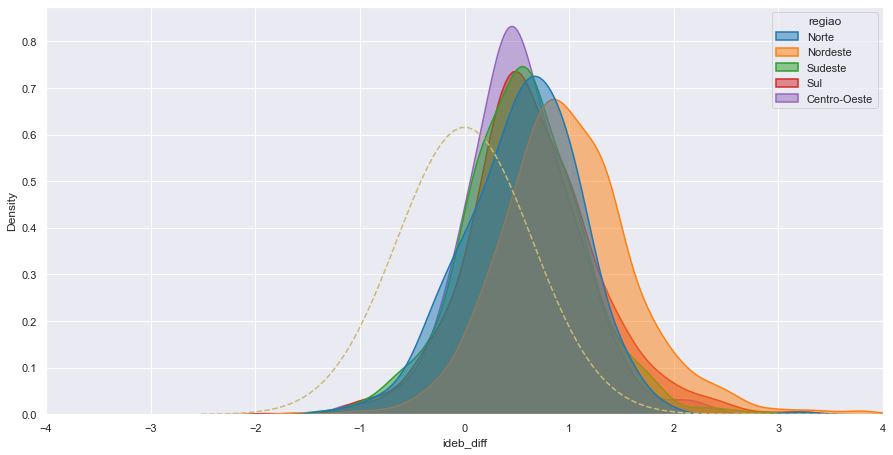

In [112]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = tabela_rafael, 
                  x= "ideb_diff",
                  hue = 'regiao',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)



media = tabela_rafael["ideb_diff"].mean()
dp =  tabela_rafael["ideb_diff"].std()

x_ = np.linspace(media - 5*dp, media + 5*dp, 100)


plt.plot(x_, 
         stats.norm.pdf(x_, 0, dp),
         '--',
         c='y')
ax.set_xlim(-4, 4)

#plt.show()

# ax.plot(x_,
#         lista_medias_municipio, 
#         marker='o', 
#         label='Média')



# ax.axvline(x=tabela_rafael["ideb_diff"].mean(),linewidth=2, color='r')

#fig.show()

In [119]:
for regiao in tabela_rafael["regiao"].unique():
    

    media = round(tabela_rafael.loc[tabela_rafael["regiao"]==regiao]["ideb_diff"].mean(),2)
    
    print("Regiao: {}  |  Média: {}".format(regiao, media))

Regiao: Norte  |  Média: 0.56
Regiao: Nordeste  |  Média: 0.98
Regiao: Sudeste  |  Média: 0.55
Regiao: Sul  |  Média: 0.65
Regiao: Centro-Oeste  |  Média: 0.53


In [123]:
for regiao in tabela_rafael["regiao"].unique():
    

    std = round(tabela_rafael.loc[tabela_rafael["regiao"]==regiao]["ideb_diff"].std(),2)
    
    print("Regiao: {}  |  Std: {}".format(regiao, std))

Regiao: Norte  |  Std: 0.56
Regiao: Nordeste  |  Std: 0.66
Regiao: Sudeste  |  Std: 0.59
Regiao: Sul  |  Std: 0.64
Regiao: Centro-Oeste  |  Std: 0.53


In [125]:
media = round(tabela_rafael["ideb_diff"].mean(),2)
std = round(tabela_rafael["ideb_diff"].std(),2)

print("Regiao: {}  |  Média: {}".format("Brasil", media))
print("Regiao: {}  |  Std: {}".format("Brasil", std))

Regiao: Brasil  |  Média: 0.72
Regiao: Brasil  |  Std: 0.65


||Brasil|Norte|Nordeste|Sul|Sudeste|Centro-Oeste|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Desvio Padrão |0.65|0.56|0.66|0.64|0.59|0.53|
|Média |0.72|0.56|0.98|0.65|0.55|0.53|

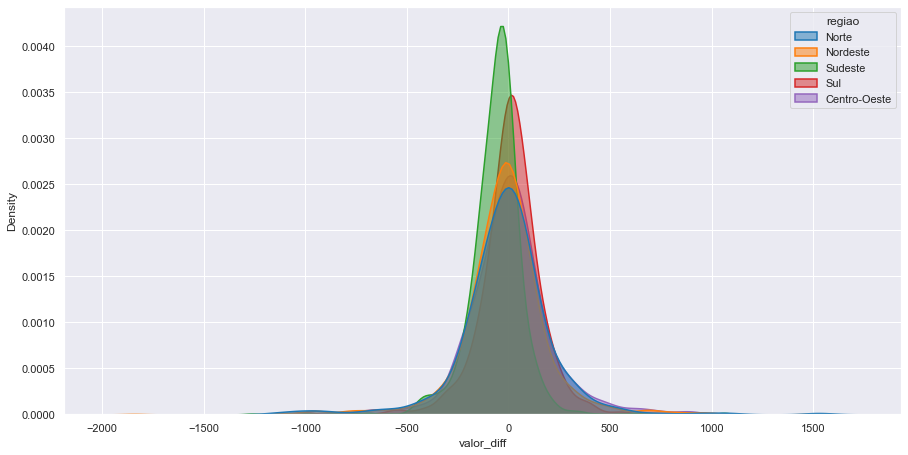

In [74]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = tabela_rafael, 
                  x= "valor_diff",
                  hue = 'regiao',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)

In [75]:
fig = px.scatter(tabela_rafael, x="valor_diff", y="ideb_diff", color="regiao", hover_data=['municipio'])
fig.show()

In [76]:
tabela_rafael_sorted = tabela_rafael.dropna().sort_values("valor_diff", ascending=False).reset_index()

In [77]:
tabela_rafael_sorted = tabela_rafael_sorted.iloc[np.r_[0:100, -100:0]]


# tabela_rafael_sorted.iloc[:20]

In [78]:
fig = px.scatter(tabela_rafael_sorted, x="valor_diff", y="ideb_diff", color="regiao", hover_data=['municipio'])
fig.show()

In [ ]:
media_valor_diff = 

# Análise Exploratória de Dados

In [25]:
anos = [1991, 2000, 2010]

lista_medias_municipio = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm"].mean()\
                for ano in anos]

lista_medias_municipio_e = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_e"].mean()\
                for ano in anos]

lista_medias_municipio_l = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_l"].mean()\
                for ano in anos]

lista_medias_municipio_r = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_r"].mean()\
                for ano in anos]


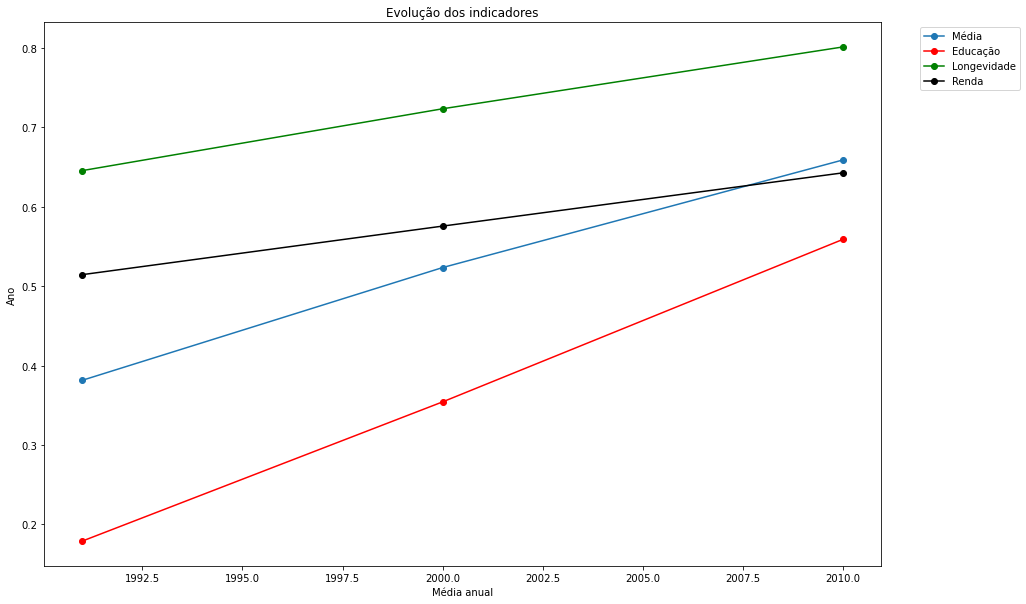

In [26]:
fig, (ax0) = plt.subplots(nrows = 1,
                            ncols = 1,
                            figsize = (15,10),
                             sharex = True)

scatter = ax0.plot(anos, 
                   lista_medias_municipio, 
                   marker='o', 
                   label='Média')


scatter = ax0.plot(anos,lista_medias_municipio_e, 
                   c = 'red', 
                   marker='o', 
                   label='Educação')

scatter = ax0.plot(anos, 
                   lista_medias_municipio_l,
                   c = 'green', 
                   marker='o', 
                   label='Longevidade')

scatter = ax0.plot(anos, 
                   lista_medias_municipio_r, 
                   c = 'black', 
                   marker='o', 
                   label='Renda')

ax0.set(title = 'Evolução dos indicadores',
        xlabel = 'Média anual',
       ylabel = 'Ano')

ax0.legend(bbox_to_anchor = (1.04,1))


(0.0, 1.0)

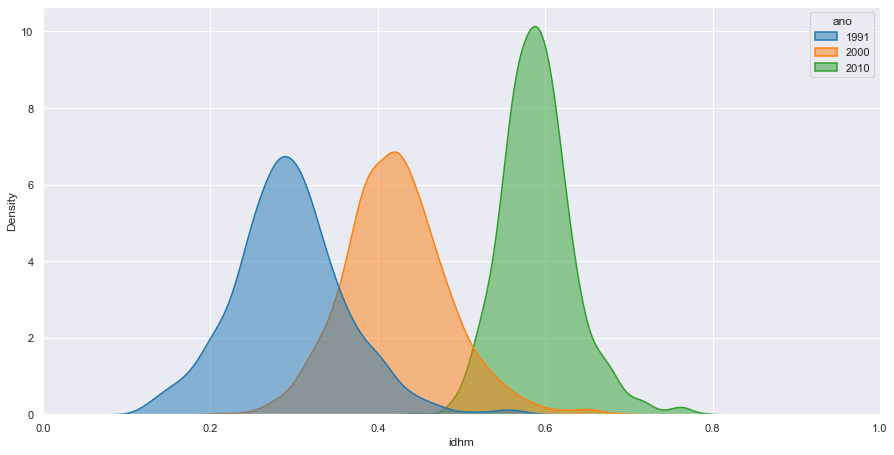

In [132]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["regiao"]=="Nordeste"], 
                  x= "idhm",
                  hue = 'ano',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)
ax.set_xlim(0, 1)



In [136]:
# Fixar escala

def f(regiao):
  
    sns.set_theme(style="darkgrid")

    fig, ax = plt.subplots(figsize = (15,7.5))

    ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["regiao"]==regiao], 
                    x= "idhm_e",
                    hue = 'ano',
                    palette = "tab10",
                    fill = True, 
                    common_norm = False, 
                    alpha = .5, 
                    linewidth = 1.5)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 12)
    

    plt.show()
    
interact(f, regiao = df_total_municipios["regiao"].unique())

interactive(children=(Dropdown(description='regiao', options=('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-O…

<function __main__.f(regiao)>

In [134]:
# Fixar escala

def f(regiao):
  
    sns.set_theme(style="darkgrid")

    fig, ax = plt.subplots(figsize = (15,7.5))

    ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["regiao"]==regiao], 
                    x= "idhm",
                    hue = 'ano',
                    palette = "tab10",
                    fill = True, 
                    common_norm = False, 
                    alpha = .5, 
                    linewidth = 1.5)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 12)
    

    plt.show()
    
interact(f, regiao = df_total_municipios["regiao"].unique())

interactive(children=(Dropdown(description='regiao', options=('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-O…

<function __main__.f(regiao)>

In [29]:
def Graf_Interativo_Ano_Regiao(Ano):
    
    sns.set_theme(style="darkgrid")

    fig, (ax0, ax1, ax2, ax3) = plt.subplots( ncols = 1,
                                              nrows = 4,
                                              figsize = (15,22),
                                              sharex = True)

    ax0 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax0)
    
    ax0.set_title('IDH Total',
                   fontsize = 18,
                   y = 1.03)
    
    ax1 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_e",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax1)
    
    ax1.set_title('IDH Escolar',
                   fontsize = 18,
                   y = 1.03)
    
    ax2 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_l",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax2)
    
    ax2.set_title('IDH Longevidade',
                   fontsize = 18,
                   y = 1.03)
    
    ax3 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_r",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax3)
    
    ax3.set_title('IDH Renda',
                   fontsize = 18,
                   y = 1.03)
    

    fig.suptitle('Distribuição de IDH Municipal', 
                 fontsize = 25, 
                 fontweight = 'bold', 
                 y = 0.92)
    
    ax1.legend_ = None
    ax2.legend_ = None
    ax3.legend_ = None
    
    ax0.legend(labels = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
               title="Região",
               loc= 0, 
               fontsize='medium', 
               fancybox= True,
               bbox_to_anchor=(0.5, 0.8, 0.5, 0.5),
               edgecolor  = '#FFFFFF',
               title_fontsize = 'large')
    
    ax0.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax1.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax2.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax3.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    
    plt.xlabel('IDH', fontsize = 20, x = 0.5)

    plt.show();

interact(Graf_Interativo_Ano_Regiao, Ano = [1991,2000, 2010])

interactive(children=(Dropdown(description='Ano', options=(1991, 2000, 2010), value=1991), Output()), _dom_cla…

<function __main__.Graf_Interativo_Ano_Regiao(Ano)>

In [30]:
def Graf_Interativo_Meso(UF):
    
    sns.set_theme(style="darkgrid")
    
    fig, ax = plt.subplots(figsize = (15,7.5))
    
    ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios['uf'] == UF], 
                     x = "idhm",
                     hue = 'mesorregiao',
                     palette = "rocket",
                     fill = True, 
                     common_norm = False, 
                     alpha = .5, 
                     linewidth = 1.5)
    
    ax.legend(labels = df_total_municipios.mesorregiao.loc[df_total_municipios['uf'] == UF].unique(),
               title="Mesorregião",
               loc= 0, 
               fontsize='medium', 
               fancybox= True,
               bbox_to_anchor=(0.5, 0.6, 0.5, 0.5),
               edgecolor  = '#FFFFFF',
               title_fontsize = 'x-large')
    
    ax.set_xlabel('IDH', 
                  fontsize = 15, 
                  y = 0.5,
                  fontweight = 'bold')
    
    ax.set_ylabel('Densidade', 
                  fontsize = 15, 
                  y = 0.5,
                  fontweight = 'bold')
    
    fig.suptitle('IDH das Mesorregiões', 
                 fontsize = 20, 
                 fontweight = 'bold',
                 y = 0.94)
        
    plt.show(); 
    
interact(Graf_Interativo_Meso,
         UF = df_total_municipios.uf.unique())

interactive(children=(Dropdown(description='UF', options=('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', '…

<function __main__.Graf_Interativo_Meso(UF)>

In [ ]:
despesas_educação = \
['Educação',
'Ensino Fundamental',
'Atenção Básica',
'Assistência à Criança e ao Adolescente',
'Educação Infantil',
'Educação de Jovens e Adultos',
'Educação Especial',
'Cultura',
'"Patrimônio Histórico, Artístico e Arqueológico"',
'Difusão Cultural',
'Ensino Superior',
'Ensino Médio',
'Ensino Profissional',
'Educação Básica',
'Ciência e Tecnologia',
'Desenvolvimento Tecnológico e Engenharia',
'Demais Subfunções Ciência e Tecnologia',
'Demais Subfunções Cultura']

In [ ]:
despesas_educação

In [ ]:
# df_despesas_full = get_data("br_tesouro_finbra.despesas_por_funcao")
# df_despesas = df_despesas_full[["id_municipio", "sigla_uf", "ano", "coluna", "conta", "valor"]].loc[(df_despesas_full["coluna"] == "Despesas Pagas") & (df_despesas_full["conta"].isin(despesas_educação))]

In [ ]:
#SELECT DISTINCT conta FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao`;

#SELECT DISTINCT coluna FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao`;

#SELECT * FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` WHERE coluna='Despesas Liquidadas' LIMIT 100;

#SELECT id_municipio, populacao, conta, valor FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao`;

#SELECT  id_municipio, sigla_uf, ano, coluna, conta, valor  FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` WHERE coluna='Despesas Empenhadas';

In [ ]:
df_despesas

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Testes

In [ ]:
despesas_orcamentarias = get_data("br_tesouro_finbra.despesas_orcamentarias")

In [ ]:
despesas_orcamentarias.head(5)

# Descrição dos dados

- **Despesa Empenhada**: Valor do orçamento público formalmente reservado (pela emissão do empenho) para compromissos assumidos com terceiros.
	
- **Despesa Liquidada**: É a verificação do direito adquirido pelo credor de receber o pagamento. É o segundo estágio da execução da despesa, precedido do empenho e antecedido do pagamento.

In [ ]:
# despesas_orcamentarias.to_csv('./Dados/despesas_orcamentarias.csv',sep=';',index=False)

In [ ]:
despesas_orcamentarias.shape

In [ ]:
despesas_orcamentarias["conta"].value_counts().keys()[:50]

In [ ]:
despesas_orcamentarias["coluna"].value_counts()